# Emotion Classification Using Machine Learning and Deep Learning

This notebook demonstrates a complete workflow for classifying emotions in text, using both traditional machine learning models and advanced deep learning with transformers. The process includes data loading, preprocessing, feature extraction, model training, evaluation, and comparison of different methods. Additionally, the notebook guides you through building an interactive Gradio web app for real-time emotion prediction and provides instructions for deploying your model as a web application using Hugging Face Spaces.

## Table of Contents

- [1. Introduction](#1-introduction)
- [2. Data Preparation and Exploration](#2-data-preparation-and-exploration)
  - [2.1 Importing Required Libraries](#21-importing-required-libraries)
  - [2.2 Importing the Dataset from Kaggle](#22-importing-the-dataset-from-kaggle)
  - [2.3 Loading and Inspecting the Data](#23-loading-and-inspecting-the-data)
  - [2.4 Exploring Class Distribution](#24-exploring-class-distribution)
  - [2.5 Visualizing Class Distribution](#25-visualizing-class-distribution)
  - [2.6 Addressing Class Imbalance](#26-addressing-class-imbalance)
  - [2.7 Label Encoding](#27-label-encoding)
  - [2.8 Splitting the Data](#28-splitting-the-data)
- [3. Feature Extraction and Classical Machine Learning Models](#3-feature-extraction-and-classical-machine-learning-models)
  - [3.1 TF-IDF Vectorization and Random Forest Classifier](#31-tf-idf-vectorization-and-random-forest-classifier)
  - [3.2 Model Prediction (Random Forest)](#32-model-prediction-random-forest)
  - [3.3 Model Evaluation (Random Forest)](#33-model-evaluation-random-forest)
  - [3.4 Naive Bayes Classifier](#34-naive-bayes-classifier)
  - [3.5 Comparing Multiple Classifiers](#35-comparing-multiple-classifiers)
- [4. Text Preprocessing](#4-text-preprocessing)
  - [4.1 Preprocessing Function with spaCy](#41-preprocessing-function-with-spacy)
  - [4.2 Applying Preprocessing to the Dataset](#42-applying-preprocessing-to-the-dataset)
  - [4.3 Training on Preprocessed Text](#43-training-on-preprocessed-text)
  - [4.4 Bag-of-Words (BOW) Model](#44-bag-of-words-bow-model)
  - [4.5 Comparing Vectorizers](#45-comparing-vectorizers)
- [5. Deep Learning Approach](#5-deep-learning-approach)
  - [5.1 Overview](#51-overview)
  - [5.2 Preparing Data for Deep Learning](#52-preparing-data-for-deep-learning)
  - [5.3 Loading Pre-trained Model and Tokenization](#53-loading-pre-trained-model-and-tokenization)
  - [5.4 Model Training (Transformers)](#54-model-training-transformers)
  - [5.5 Model Evaluation (Transformers)](#55-model-evaluation-transformers)
  - [5.6 Saving and Reloading the Model](#56-saving-and-reloading-the-model)
  - [5.7 Evaluating the Reloaded Model](#57-evaluating-the-reloaded-model)
- [6. Design and Deploy a Gradio App](#6-design-and-deploy-a-gradio-app)
  - [6.1 Interactive Emotion Classification Demo with Gradio](#61-interactive-emotion-classification-demo-with-gradio)
  - [6.2 Deploying a Gradio App to Hugging Face Spaces](#62-deploying-a-gradio-app-to-hugging-face-spaces)


## 1. Introduction

Emotion classification is a fundamental task in Natural Language Processing (NLP) that involves identifying the emotional tone behind a body of text. This notebook explores multiple techniques for emotion classification, starting from classical machine learning algorithms to advanced deep learning models such as transformers. The dataset used contains text samples labeled with emotions such as joy, sadness, anger, and fear. The goal is to build robust models that can accurately predict the emotion expressed in a given text.

**Key steps covered:**
- Data loading and exploration
- Data preprocessing and balancing
- Feature extraction (TF-IDF, Bag-of-Words)
- Model training and evaluation (Random Forest, Naive Bayes, KNN, Transformers)
- Visualization and comparison of results
- Interactive Gradio app for real-time emotion prediction
- Instructions for deploying the Gradio app to Hugging Face Spaces

This end-to-end workflow demonstrates not only how to build and compare emotion classification models, but also how to make them accessible through an interactive web interface for practical use.

## 2. Data Preparation and Exploration

### 2.1 Importing Required Libraries

Below, we import all necessary libraries for data manipulation, visualization, machine learning, and deep learning. This includes pandas, matplotlib, seaborn, scikit-learn, spaCy, and Hugging Face transformers.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing
import spacy

# Machine Learning - scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# File and OS operations
import os
import shutil
import zipfile

# Deep Learning and Transformers
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset

# Gradio for web app interface
import gradio as gr

# PyTorch for tensor operations
import torch

### 2.2 Importing the Dataset from Kaggle

The following code downloads the emotion dataset from Kaggle, extracts it, and prepares it for further analysis. Ensure your Kaggle API credentials are available as `kaggle.json` in your working directory.


In [ ]:
os.makedirs("EMOTION DATASET", exist_ok=True)

kaggle_json_path = os.path.expanduser("kaggle.json")
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
if not os.path.exists(os.path.join(kaggle_dir, "kaggle.json")):
    shutil.copy(kaggle_json_path, os.path.join(kaggle_dir, "kaggle.json"))

os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp -p "EMOTION DATASET"

with zipfile.ZipFile("EMOTION DATASET/emotions-dataset-for-nlp.zip", "r") as zip_ref:
    zip_ref.extractall("EMOTION DATASET")


### 2.3 Loading and Inspecting the Data

We load the training and test datasets into pandas DataFrames and display the first few rows to understand the structure of the data.


In [2]:
df_train = pd.read_csv(
    "EMOTION DATASET/train.txt",
    sep=";",
    header=None,
    names=["text", "emotion"],
    engine="python",
)
df_test = pd.read_csv(
    "EMOTION DATASET/test.txt",
    sep=";",
    header=None,
    names=["text", "emotion"],
    engine="python",
)

df_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### 2.4 Exploring Class Distribution

Let's examine the distribution of emotion classes in the training data to check for class imbalance.

In [ ]:
df_train["emotion"].value_counts()

### 2.5 Visualizing Class Distribution

We visualize the count of each emotion class to better understand the class imbalance in the dataset.

In [ ]:
sns.countplot(data=df_train, x=df_train["emotion"])
plt.title("Count of Emotions")
plt.show()

In [ ]:
# Display information about the training DataFrame, including data types and non-null counts.
df_train.info()


### 2.6 Addressing Class Imbalance

To ensure fair training, we balance the dataset by sampling an equal number of examples from the major emotion classes: `joy`, `sadness`, `anger`, and `fear`.
We sample 1900 examples from each selected emotion class to create a balanced training set.


In [3]:
# Balancing the Dataset
min_samples = 1900
df_train_balanced = (
    df_train[df_train["emotion"].isin(["anger", "fear", "joy", "sadness"])]
    .groupby("emotion", group_keys=False)
    .apply(lambda x: x.sample(min_samples, random_state=2025))
)
df_train_balanced["emotion"].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_8608\2977010841.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_samples, random_state=2025))


emotion
anger      1900
fear       1900
joy        1900
sadness    1900
Name: count, dtype: int64

### 2.7 Label Encoding

Convert emotion labels to numeric values for model training.

In [4]:
# Map each emotion to a unique integer for use in classification algorithms.

df_train_balanced["emotion_num"] = df_train_balanced["emotion"].map(
    {"anger": 0, "fear": 1, "joy": 2, "sadness": 3}
)
df_train_balanced.reset_index(drop=True).head()

,text,emotion,emotion_num
0,i tend to come away feeling insulted by books ...,anger,0
1,i feel so spiteful towards people sometimes ju...,anger,0
2,i feel like i just cant be bothered,anger,0
3,i feel anger torward those who are greedy,anger,0
4,i feel that we are heading for an abyss that h...,anger,0


### 2.8 Splitting the Data

Split the balanced dataset into training and test sets for model evaluation. We use stratified splitting to maintain class proportions in both training and test sets.

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_train_balanced["text"],
    df_train_balanced["emotion_num"],
    test_size=0.2,
    random_state=2025,
    stratify=df_train_balanced["emotion_num"],
)

print(
    f"The shape of the training set is: {X_train.shape}\n"
    f"The shape of the test set is: {X_test.shape}"
)

The shape of the training set is: (6080,)
The shape of the test set is: (1520,)


In [6]:
# Verify the distribution of emotion labels in the test set after splitting.
y_test.value_counts()


emotion_num
2    380
1    380
3    380
0    380
Name: count, dtype: int64

## 3. Feature Extraction and Classical Machine Learning Models

### 3.1 TF-IDF Vectorization and Random Forest Classifier

We use a TF-IDF vectorizer to convert text into numerical features and train a Random Forest classifier to predict emotions.

In [7]:
clf_rf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier())])
clf_rf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

### 3.2 Model Prediction (Random Forest)
Predict emotions for the test set and a sample string using the trained Random Forest model.

In [14]:
y_pred = clf_rf.predict(X_test)

id2label = {0: "anger", 1: "fear", 2: "joy", 3: "sadness"}

string = "I am really sad right now."
pred_id = clf_rf.predict([string])[0]
pred_label = id2label[pred_id]
print(f"Text: {string}\nPredicted Emotion: {pred_label}")

Text: I am really sad right now.
Predicted Emotion: sadness


### 3.3 Model Evaluation (Random Forest)

Evaluate the performance of the Random Forest classifier using accuracy, classification report, and a heatmap visualization.

The accuracy of the model is 86.84%
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       380
           1       0.91      0.90      0.91       380
           2       0.79      0.90      0.84       380
           3       0.87      0.80      0.84       380

    accuracy                           0.87      1520
   macro avg       0.87      0.87      0.87      1520
weighted avg       0.87      0.87      0.87      1520



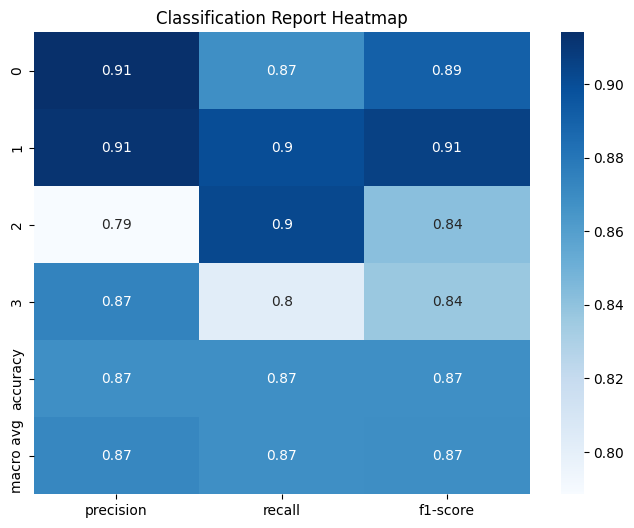

In [15]:
print(f"The accuracy of the model is {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose().fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

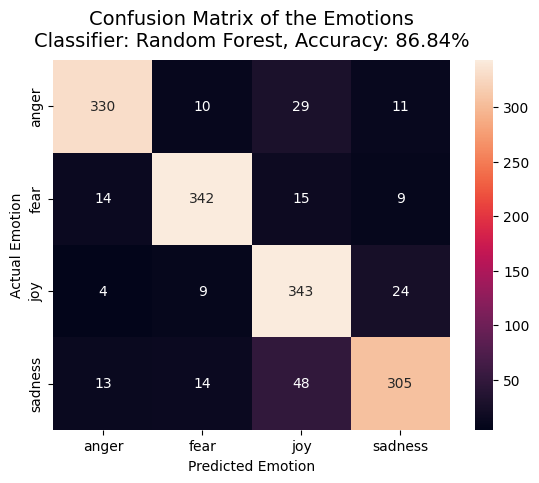

In [16]:
# Confusion Matrix (Random Forest)
cm = confusion_matrix(y_test, y_pred, labels=clf_rf.classes_)
acc_score = accuracy_score(y_test, y_pred) * 100
cm_df = pd.DataFrame(
    cm,
    index=df_train_balanced["emotion"].unique(),
    columns=df_train_balanced["emotion"].unique(),
)

sns.heatmap(cm_df, annot=True, fmt="d")
plt.title(
    "Confusion Matrix of the Emotions\n"
    f"Classifier: Random Forest, Accuracy: {acc_score:.2f}%",
    fontsize=14,
    pad=10,
)
plt.xlabel("Predicted Emotion")
plt.ylabel("Actual Emotion")
plt.show()

### 3.4 Naive Bayes Classifier

Train and evaluate a Multinomial Naive Bayes classifier using TF-IDF features.

In [17]:
clf_nb = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB())])

clf_nb.fit(X_train, y_train)

y_pred = clf_nb.predict(X_test)

print(
    f"The accuracy of the model using Naive Bayes classifier is {accuracy_score(y_test, y_pred) * 100:.2f}%"
)
print(classification_report(y_test, y_pred))

The accuracy of the model using Naive Bayes classifier is 85.13%
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       380
           1       0.86      0.83      0.85       380
           2       0.88      0.89      0.88       380
           3       0.84      0.81      0.82       380

    accuracy                           0.85      1520
   macro avg       0.85      0.85      0.85      1520
weighted avg       0.85      0.85      0.85      1520



### 3.5 Comparing Multiple Classifiers

Compare the performance of Random Forest, Naive Bayes, and K-Nearest Neighbors classifiers using TF-IDF features. Visualize their confusion matrices side by side.


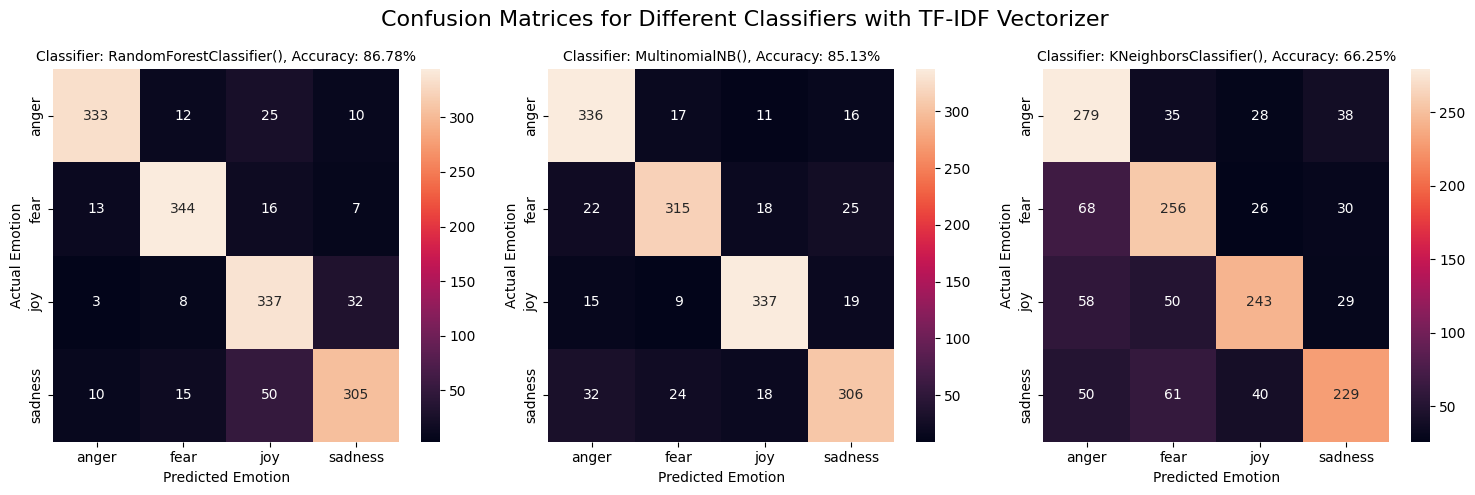

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

for i, classifier_name, classifier in zip(
    range(3), classifiers.keys(), classifiers.values()
):
    clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", classifier)])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred) * 100

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    cm_df = pd.DataFrame(
        cm,
        index=df_train_balanced["emotion"].unique(),
        columns=df_train_balanced["emotion"].unique(),
    )
    sns.heatmap(cm_df, annot=True, fmt="d", ax=axs[i])
    axs[i].set_title(
        f"Classifier: {classifier}, Accuracy: {acc_score:.2f}%", fontsize=10
    )
    axs[i].set_xlabel("Predicted Emotion")
    axs[i].set_ylabel("Actual Emotion")

fig.suptitle(
    "Confusion Matrices for Different Classifiers with TF-IDF Vectorizer", fontsize=16
)
plt.tight_layout()
plt.show()


## 4. Text Preprocessing

### 4.1 Preprocessing Function with spaCy

Define a function to preprocess text by removing stopwords and punctuation, and lemmatizing tokens using spaCy.

In [20]:
nlp = spacy.load("en_core_web_lg")


def preprocess_text(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)


### 4.2 Applying Preprocessing to the Dataset

Apply the preprocessing function to all text samples in the balanced training set.

In [21]:
df_train_balanced["preprocessed_text"] = df_train_balanced["text"].apply(
    preprocess_text
)
df_train_balanced.reset_index(drop=True).head()

,text,emotion,emotion_num,preprocessed_text
0,i tend to come away feeling insulted by books ...,anger,0,tend come away feeling insult book deny
1,i feel so spiteful towards people sometimes ju...,anger,0,feel spiteful people way look make want hurt
2,i feel like i just cant be bothered,anger,0,feel like not bother
3,i feel anger torward those who are greedy,anger,0,feel anger torward greedy
4,i feel that we are heading for an abyss that h...,anger,0,feel head abyss create greedy greedy far greedy


### 4.3 Training on Preprocessed Text

Train and evaluate classical classifiers using the preprocessed text data.

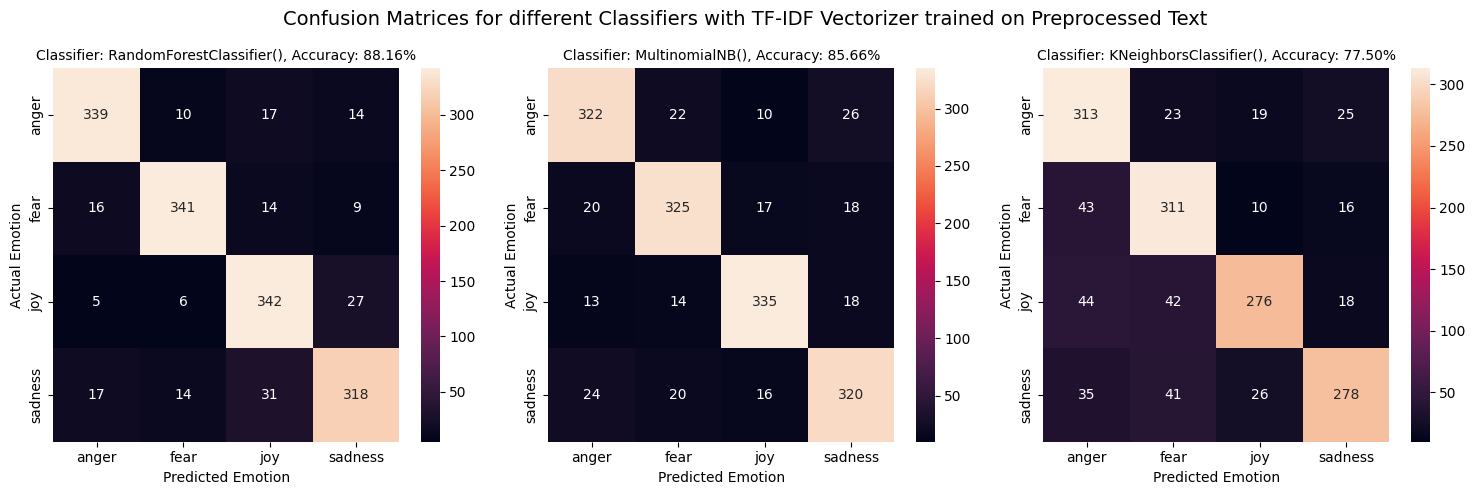

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train_balanced["preprocessed_text"],
    df_train_balanced["emotion_num"],
    test_size=0.2,
    random_state=2025,
    stratify=df_train_balanced["emotion_num"],
)


classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, classifier_name, classifier in zip(
    range(3), classifiers.keys(), classifiers.values()
):
    clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", classifier)])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred) * 100

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    cm_df = pd.DataFrame(
        cm,
        index=df_train_balanced["emotion"].unique(),
        columns=df_train_balanced["emotion"].unique(),
    )
    sns.heatmap(cm_df, annot=True, fmt="d", ax=axs[i])
    axs[i].set_title(
        f"Classifier: {classifier}, Accuracy: {acc_score:.2f}%", fontsize=10
    )
    axs[i].set_xlabel("Predicted Emotion")
    axs[i].set_ylabel("Actual Emotion")

fig.suptitle(
    "Confusion Matrices for different Classifiers with TF-IDF Vectorizer trained on Preprocessed Text",
    fontsize=14,
)
plt.tight_layout()
plt.show()

### 4.4 Bag-of-Words (BOW) Model

Use a Bag-of-Words model with CountVectorizer and Random Forest to classify emotions.

In [23]:
clf_cv = Pipeline([("cv", CountVectorizer()), ("clf", RandomForestClassifier())])

clf_cv.fit(X_train, y_train)

y_pred = clf_cv.predict(X_test)

print(f"The accuracy of the model is {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

The accuracy of the model is 89.28%
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       380
           1       0.93      0.91      0.92       380
           2       0.91      0.88      0.89       380
           3       0.83      0.88      0.86       380

    accuracy                           0.89      1520
   macro avg       0.89      0.89      0.89      1520
weighted avg       0.89      0.89      0.89      1520



### 4.5 Comparing Vectorizers

Compare the performance of CountVectorizer and TF-IDF vectorizer with Random Forest on preprocessed text.


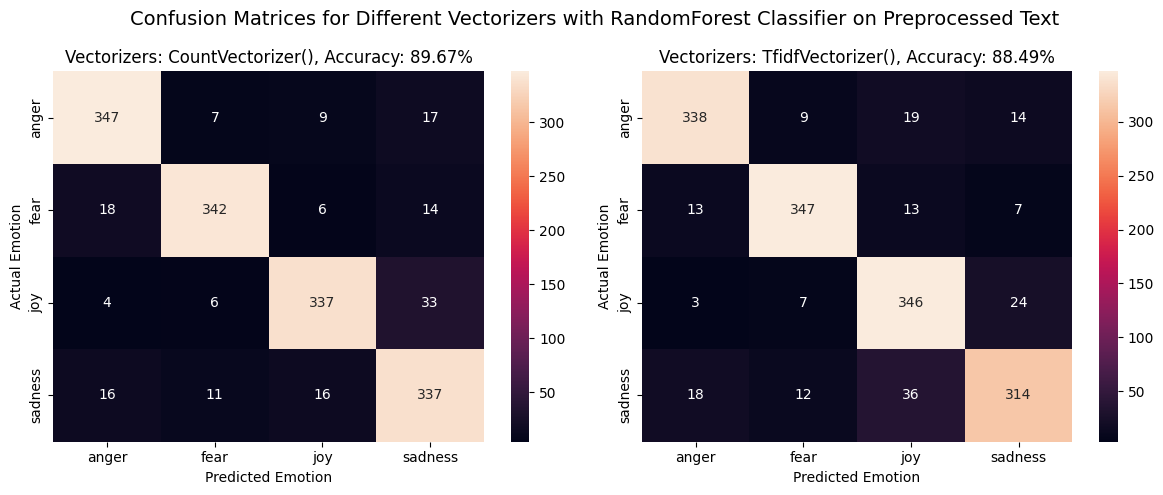

In [24]:
vectorizers = {
    "CountVectorizer": CountVectorizer(),
    "TF-DF": TfidfVectorizer(),
}


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, vectorizer_name, vectorizer in zip(
    range(2), vectorizers.keys(), vectorizers.values()
):
    clf = Pipeline([("vectorizer", vectorizer), ("clf", RandomForestClassifier())])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred) * 100

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    cm_df = pd.DataFrame(
        cm,
        index=df_train_balanced["emotion"].unique(),
        columns=df_train_balanced["emotion"].unique(),
    )
    sns.heatmap(cm_df, annot=True, fmt="d", ax=axs[i])
    axs[i].set_title(
        f"Vectorizers: {vectorizer}, Accuracy: {acc_score:.2f}%", fontsize=12
    )
    axs[i].set_xlabel("Predicted Emotion")
    axs[i].set_ylabel("Actual Emotion")

fig.suptitle(
    "Confusion Matrices for Different Vectorizers with RandomForest Classifier on Preprocessed Text",
    fontsize=14,
)
plt.tight_layout()
plt.show()

## 5. Deep Learning Approach

### 5.1 Overview

We now move to a deep learning approach using transformer models for emotion classification.

In this section, we leverage state-of-the-art transformer architectures, specifically the DistilBERT model, to capture complex semantic and contextual information from text. Transformers have demonstrated superior performance in various NLP tasks due to their ability to model long-range dependencies and nuanced language patterns. We will prepare the data for deep learning, fine-tune a pre-trained transformer model on our emotion dataset, and evaluate its performance using standard metrics. This approach aims to improve classification accuracy and robustness compared to traditional machine learning methods.

### 5.2 Preparing Data for Deep Learning

Format the preprocessed data for use with Hugging Face's transformers library.

In [ ]:
train_df = df_train_balanced[["preprocessed_text", "emotion_num"]].rename(
    columns={"preprocessed_text": "text", "emotion_num": "label"}
)
dataset = Dataset.from_pandas(train_df)


### 5.3 Loading Pre-trained Model and Tokenization

Load the pre-trained `distilbert-base-uncased` model and tokenize the text data for input to the model.

In [ ]:
# Tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=4
)


def tokenize_function(examples):
    return tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=128
    )


tokenized_datasets = dataset.map(tokenize_function, batched=True)


### 5.4 Model Training (Transformers)

Train the transformer model using the Hugging Face Trainer API.

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_dir="./logs",
    logging_steps=20,
    fp16=True,
    run_name="distilbert-base-uncased-e-10",
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets,  # Use a validation split in practice
)

trainer.train()


### 5.5 Model Evaluation (Transformers)

Evaluate the trained transformer model on the dataset and compute accuracy and classification metrics.


In [ ]:
predictions = trainer.predict(tokenized_datasets)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids


In [ ]:
# 1. Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")
# 2. Classification report
print(classification_report(y_true, y_pred))

In [ ]:
# 3. Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = df_train_balanced["emotion"].unique()
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.xlabel("Predicted Emotion")
plt.ylabel("Actual Emotion")
plt.title(
    "Confusion Matrix of the Emotions\n"
    f"Model: distilbert-base-uncased, accuracy: {acc * 100:.2f}%",
    fontsize=14,
    pad=10,
)
plt.show()


### 5.6 Saving and Reloading the Model
Save the trained transformer model and demonstrate how to reload it for future inference.

In [ ]:
trainer.save_model("distilbert-base-uncased-e-10")
model_distilbert_base = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-e-10"
)


### 5.7 Evaluating the Reloaded Model

Evaluate the reloaded transformer model to ensure consistent performance and visualize the results.

In [ ]:
model_distilbert_base = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-e-10"
)
# Create a new Trainer with the loaded model
trainer_loaded = Trainer(model=model_distilbert_base)

# Make predictions using the trainer
predictions = trainer_loaded.predict(tokenized_datasets)

y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# 1. Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")
# 2. Classification report
print(classification_report(y_true, y_pred))

# 3. Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = df_train_balanced["emotion"].unique()
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 6. Design and Deploy a Gradio App

In this section, we will design a Gradio app that enables users to input text and receive real-time emotion predictions from our trained deep learning model. Additionally, we provide detailed instructions on how to deploy this Gradio app to Hugging Face Spaces, making it accessible as a web application for broader use.

### 6.1 Interactive Emotion Classification Demo with Gradio

In [ ]:
# Load the trained model and tokenizer from the saved directory
model_path = "distilbert-base-uncased-e-10"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Mapping from label IDs to emotion names
id2label = {0: "anger", 1: "fear", 2: "joy", 3: "sadness"}


def predict_emotion(text):
    # Tokenize the input text for the model
    inputs = tokenizer(
        text, return_tensors="pt", truncation=True, padding=True, max_length=128
    )
    with torch.no_grad():
        # Get model predictions
        outputs = model(**inputs)
        # Convert logits to probabilities using softmax
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        # Return a dictionary mapping emotions to their predicted probabilities
        return {id2label[i]: float(probs[0][i]) for i in range(len(id2label))}


# Create a Gradio interface for interactive emotion prediction
demo = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs=gr.Label(num_top_classes=4),
    title="Emotion Classifier",
    description="Enter a sentence to classify its emotion (anger, fear, joy, sadness).",
)

# Launch the Gradio app
demo.launch(inline=True)



### 6.2 Deploying a Gradio App to Hugging Face Spaces

To deploy a Gradio app to Hugging Face Spaces using **Git**, follow these instructions:

#### I. Create a Hugging Face Account

If you don’t already have one, sign up at:
👉 [https://huggingface.co/join](https://huggingface.co/join)


#### II. Create a Space (Repository)

After logging in:

1. Go to **[Spaces](https://huggingface.co/spaces)**.
2. Click **"Create new Space"**.
3. Choose:

   * **Repository Name** (e.g., `emotion-classifier`)
   * **SDK**: Choose **Gradio**
   * **Visibility**: Public or Private
4. Click **"Create Space"**


#### III. (Optional) Install Git LFS

Hugging Face uses **Git LFS (Large File Storage)** for storing model files like `.bin` weights.

Install it using:

```bash
git lfs install
```

> ⚠️ If you're pushing large model files (e.g., `pytorch_model.bin`), this is required.


#### IV. Clone the Space Repository Locally

In your terminal or notebook:

```bash
git clone https://huggingface.co/spaces/YOUR_USERNAME/YOUR_REPO_NAME
cd YOUR_REPO_NAME
```

Replace `YOUR_USERNAME` and `YOUR_REPO_NAME` with your actual Hugging Face username and repo name.


#### V. Add Your Gradio App Files

Create or copy the following files into this cloned repo:

##### `app.py`

```python
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import gradio as gr

# Load model from local folder (uploaded to the Space)
model_path = "distilbert-base-uncased-e-10"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Map IDs to emotions
id2label = {0: "anger", 1: "fear", 2: "joy", 3: "sadness"}

def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        return {id2label[i]: float(probs[0][i]) for i in range(len(id2label))}

demo = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs=gr.Label(num_top_classes=4),
    title="Emotion Classifier",
    description="Enter a sentence to classify its emotion (anger, fear, joy, sadness).",
)

demo.launch(inline=True)
```

##### `requirements.txt`

```txt
gradio
torch
transformers
```

##### Upload Model Folder

Ensure the folder containing your trained model files is also in the repo:

```bash
cp -r /path/to/distilbert-base-uncased-e-10 .
```

The folder should contain:

* `config.json`
* `pytorch_model.bin`
* `tokenizer_config.json`
* `vocab.txt` or `tokenizer.json` (depending on the model)
* `special_tokens_map.json` (if applicable)


#### VI. Configure Git (Optional for First Time)

If you're pushing for the first time, set your Git credentials:

```bash
git config user.email "you@example.com"
git config user.name "YourUsername"
```


#### VII. Commit and Push Files

You can commit everything together:

```bash
git add .
git commit -m "Initial commit: Add Gradio app and model"
git push
```

Or commit files individually:

```bash
git add app.py
git commit -m "Add Gradio app"
git add requirements.txt
git commit -m "Add requirements"
git add distilbert-base-uncased-e-10
git commit -m "Add model files"
git push
```


#### VIII. Done! 

Your Space will now automatically build and launch at:

https://huggingface.co/spaces/YOUR_USERNAME/YOUR_REPO_NAME

You’ll see a live interactive UI for your Gradio app!



## Notes on Model Performance and Feature Engineering

### Why Do Some ML Models Perform Better Than Others?

Different machine learning models have varying strengths in handling text data. In this project, the Random Forest classifier consistently outperformed Naive Bayes and K-Nearest Neighbors (KNN). This is because Random Forest, as an ensemble of decision trees, can capture complex, non-linear relationships in the feature space and is less sensitive to noise and irrelevant features. Naive Bayes, while fast and effective for simple problems, assumes feature independence, which is rarely true for natural language data. KNN, on the other hand, can struggle with high-dimensional sparse data typical of text, making it less effective for this task.

### The Role of Vectorizing Techniques

Feature extraction methods like TF-IDF and Bag-of-Words (CountVectorizer) transform raw text into numerical representations that models can process. The choice of vectorizer impacts model performance:
- **TF-IDF** weighs words by their importance, reducing the influence of common words and highlighting distinctive terms.
- **CountVectorizer (Bag-of-Words)** simply counts word occurrences, which can sometimes capture useful frequency patterns missed by TF-IDF.

In this project, CountVectorizer provided slightly better accuracy than TF-IDF with Random Forest on preprocessed text. This suggests that, for this dataset, raw word frequencies were more informative for the classifier than the relative importance captured by TF-IDF.

### Impact of Text Preprocessing

Preprocessing (such as stopword removal, lemmatization, and punctuation filtering) helps reduce noise and standardize the text. This leads to more meaningful and consistent features, allowing models to focus on the core semantic content. As observed, all classifiers performed slightly better on preprocessed text, as irrelevant or redundant information was minimized, improving the signal-to-noise ratio in the feature space.

### Why Do Transformers Outperform Classical ML Models?

Transformer-based deep learning models (like DistilBERT) significantly outperform classical ML models because they:
- **Capture Context:** Transformers use self-attention mechanisms to understand the context and relationships between all words in a sentence, not just isolated word counts.
- **Leverage Pretraining:** Pretrained on massive text corpora, transformers have a deep understanding of language structure, semantics, and even subtle emotional cues.
- **Fine-Tuning:** When fine-tuned on the emotion dataset, transformers adapt their rich language representations to the specific task, leading to superior accuracy and generalization.
